In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import ast
import numpy as np

In [8]:
AIC = pd.read_csv('../../Data/Rheologu_Oxford/AIC_XHR.csv',index_col=0)
# Ensure competitive_models are parsed as lists, not strings
AIC['competitive_models'] = AIC['competitive_models'].apply(lambda x: x if isinstance(x, list) else ast.literal_eval(x))


In [9]:
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_LNV,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,Slip,best_model,competitive_models,uncertain,PLV_N
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931


Percentage of events with competitive models assigned even weights vs aikike weights

In [51]:
# Create a model support counter
model_weights = defaultdict(float)

# Iterate through each event
for _, row in AIC.iterrows():
    if not row['uncertain']:
        # Certain case: assign full weight to best model
        model_weights[row['best_model']] += 1.0
    else:
        # Uncertain case: divide weight equally among competitive models
        weight = 1.0 / len(row['competitive_models'])
        for model in row['competitive_models']:
            model_weights[model] += weight

# Convert to a Series for easy display/sorting
model_weights_series = pd.Series(model_weights).sort_values(ascending=False)

print(model_weights_series)

# Convert to percentage
total_events = len(AIC)
model_weights_percent = (model_weights_series)# / total_events) * 100

# Round for cleaner display
model_weights_percent = model_weights_percent.round(2)

print(model_weights_percent)


PLV        22.250000
LNV        14.250000
VSFBSS      8.916667
VSFSS       2.416667
VSFASS      1.166667
VSF_aSS     1.000000
dtype: float64
PLV        22.25
LNV        14.25
VSFBSS      8.92
VSFSS       2.42
VSFASS      1.17
VSF_aSS     1.00
dtype: float64


Assigning Aikike weights to columns

In [11]:
# List of your model names (same order as AIC columns and delta_AIC columns)
model_names = ['LNV', 'PLV', 'VSF_SS', 'VSF_aSS', 'VSF_bSS']

# Create empty columns in AIC for each Akaike weight
for model in model_names:
    AIC[f'w_{model}'] = np.nan

# Compute and store Akaike weights row-by-row
for i, row in AIC.iterrows():
    # Get delta AICs as a dict
    delta_aics = {model: row[f'delta_AIC_{model}'] for model in model_names}
    
    # Unnormalised weights
    weights = {model: np.exp(-0.5 * delta) for model, delta in delta_aics.items()}
    
    # Normalise
    total_weight = sum(weights.values())
    akaike_weights = {model: w / total_weight for model, w in weights.items()}
    
    # Assign to DataFrame
    for model in model_names:
        AIC.at[i, f'w_{model}'] = akaike_weights[model]


In [12]:
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_LNV,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,Slip,best_model,competitive_models,uncertain,PLV_N,w_LNV,w_PLV,w_VSF_SS,w_VSF_aSS,w_VSF_bSS
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243,4.141308e-02,0.958204,5.767303e-20,1.212555e-20,0.000383
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452,5.159180e-14,0.500000,9.956217e-16,5.263215e-18,0.500000
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000,6.333105e-17,0.013513,3.776740e-01,4.645613e-01,0.144252
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107,4.121599e-01,0.480132,1.383028e-07,4.120362e-08,0.107708
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351,2.052097e-03,0.498974,1.687282e-15,2.442719e-16,0.498974
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201,1.162474e-03,0.998742,4.449409e-08,1.576695e-08,0.000095
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891,3.494496e-01,0.644135,2.342481e-26,2.306625e-27,0.006416
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462,2.458688e-07,0.500000,5.256331e-41,1.228888e-42,0.500000
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909,8.365966e-03,0.495817,1.289305e-35,9.725302e-37,0.495817
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931,1.227884e-03,0.499386,4.850782e-31,4.670426e-32,0.499386


Bootstrap for confidence intervals

In [13]:
def bootstrap_model_support(AIC, model_names, n_iterations=1000, sample_size=50, random_state=None):
    """
    Bootstrap model support using Akaike weights from the AIC DataFrame.

    Parameters:
        AIC (pd.DataFrame): Original dataframe with w_{model} columns.
        model_names (list): List of model name strings, e.g., ['LNV', 'PLV', 'VSF_SS', ...].
        n_iterations (int): Number of bootstrap resamples to run.
        sample_size (int): Number of events per resample (typically 50).
        random_state (int or None): For reproducibility.

    Returns:
        pd.DataFrame: Each row is a bootstrap run, each column is model percentage support.
    """
    rng = np.random.default_rng(random_state)
    results = []

    for _ in range(n_iterations):
        # Resample with replacement
        resampled = AIC.sample(n=sample_size, replace=True, random_state=rng.integers(0, 1e9))

        # Sum Akaike weights for each model
        support = {
            model: resampled[f'w_{model}'].sum() / sample_size * 100
            for model in model_names
        }

        results.append(support)

    return pd.DataFrame(results)

In [14]:
bootstrap_df = bootstrap_model_support(AIC, model_names, n_iterations=1000, sample_size=50, random_state=42)

# Example preview
print(bootstrap_df.head())

         LNV        PLV    VSF_SS   VSF_aSS    VSF_bSS
0  26.582706  34.796372  8.633957  5.493094  24.493870
1  29.925763  43.300962  3.957383  4.325755  18.490138
2  33.671964  37.030614  6.075571  3.593300  19.628551
3  30.794991  39.923686  5.684636  5.955914  17.640773
4  25.267840  38.765211  7.139662  7.578512  21.248775


In [15]:
colors = {
    'VSF_SS': '#a50026',    
    'VSF_aSS': '#f46d43',   
    'VSF_bSS': '#fee090',   
    'LNV': '#74add1',       
    'PLV': '#313695'        
}


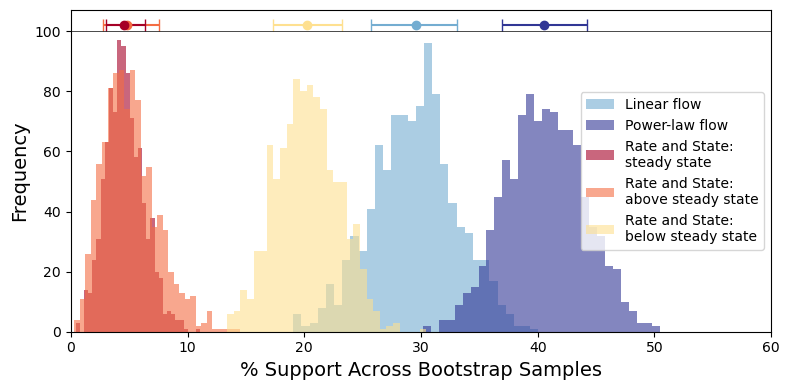

In [49]:
# CI summary table as before
ci_summary = bootstrap_df.quantile([0.15, 0.5, 0.85]).T
ci_summary.columns = ['15th', '50th', '85th']
ci_summary = ci_summary.sort_values('50th', ascending=False)


plt.figure(figsize=(8, 4))

# Overlay histograms with transparency so they don't block each other
plt.hist(bootstrap_df['LNV'], bins=30, color=colors['LNV'], alpha=0.6, label='Linear flow')
plt.hist(bootstrap_df['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_df['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_df['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_df['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

plt.xlabel('% Support Across Bootstrap Samples',fontsize=14)
plt.ylabel('Frequency',fontsize=14)



for i, model in enumerate(ci_summary.index):
    median = ci_summary.loc[model, '50th']
    low = ci_summary.loc[model, '15th']
    high = ci_summary.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=102,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )


plt.legend(loc='center right')
plt.xlim([0,60])
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.tight_layout()
plt.savefig('histograms_preweight.pdf')
plt.show()

In [50]:
ci_summary

,15th,50th,85th
PLV,36.970603,40.579924,44.220444
LNV,25.734600,29.573204,33.072091
VSF_bSS,17.322487,20.212377,23.192582
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


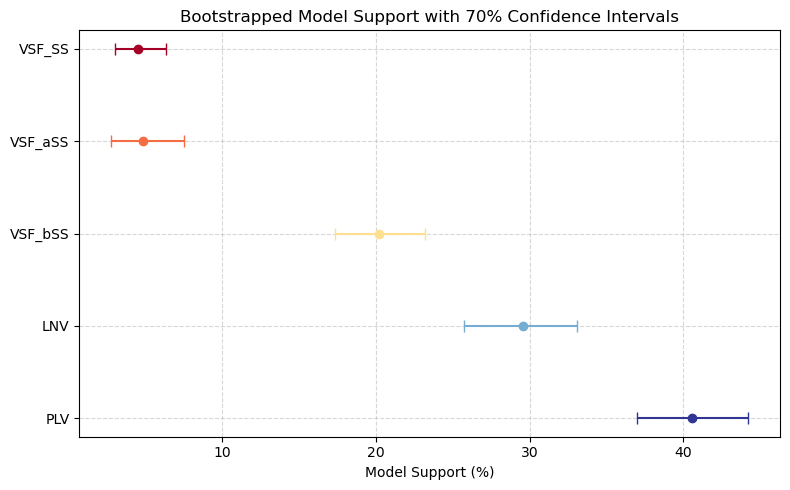

In [17]:
import matplotlib.pyplot as plt

# CI summary table as before
ci_summary = bootstrap_df.quantile([0.15, 0.5, 0.85]).T
ci_summary.columns = ['15th', '50th', '85th']
ci_summary = ci_summary.sort_values('50th', ascending=False)

# Plot
plt.figure(figsize=(8, 5))

for i, model in enumerate(ci_summary.index):
    median = ci_summary.loc[model, '50th']
    low = ci_summary.loc[model, '15th']
    high = ci_summary.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=i,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
        label=model
    )

# Label formatting
plt.yticks(ticks=range(len(ci_summary)), labels=ci_summary.index)
plt.xlabel('Model Support (%)')
plt.title('Bootstrapped Model Support with 70% Confidence Intervals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('confidence_intervals_preweight.pdf')
plt.show()


In [18]:
ci_summary

,15th,50th,85th
PLV,36.970603,40.579924,44.220444
LNV,25.734600,29.573204,33.072091
VSF_bSS,17.322487,20.212377,23.192582
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


Making LNV -> Plv

In [111]:
AIC_no_LNV = pd.DataFrame({'PLV':AIC['PLV'],'VSF_SS':AIC['VSF_SS'],'VSF_aSS':AIC['VSF_aSS'],'VSF_bSS':AIC['VSF_bSS']})
rheology_XHR = AIC_no_LNV.idxmin(axis=1,skipna=True)
DAIC_PLV = []
DAIC_VSF_SS = []
DAIC_VSF_aSS = []
DAIC_VSF_bSS = []
for i in range(len(AIC_no_LNV)):
    DAIC_PLV.append((AIC_no_LNV.iloc[i] - AIC_no_LNV[rheology_XHR[i]].iloc[i])['PLV'])
    DAIC_VSF_SS.append((AIC_no_LNV.iloc[i] - AIC_no_LNV[rheology_XHR[i]].iloc[i])['VSF_SS'])
    DAIC_VSF_aSS.append((AIC_no_LNV.iloc[i] - AIC_no_LNV[rheology_XHR[i]].iloc[i])['VSF_aSS'])
    DAIC_VSF_bSS.append((AIC_no_LNV.iloc[i] - AIC_no_LNV[rheology_XHR[i]].iloc[i])['VSF_bSS'])
AIC_no_LNV['delta_AIC_PLV'] = DAIC_PLV
AIC_no_LNV['delta_AIC_VSF_SS'] = DAIC_VSF_SS
AIC_no_LNV['delta_AIC_VSF_aSS'] = DAIC_VSF_aSS
AIC_no_LNV['delta_AIC_VSF_bSS'] = DAIC_VSF_bSS


In [114]:
def flag_model_selection_uncertainty(aic_df, delta_cols):
    """
    Flags the best model and whether there's model uncertainty (ΔAIC ≤ 2).
    
    Parameters:
    - aic_df: pd.DataFrame with AIC and ΔAIC columns
    - delta_cols: list of column names corresponding to delta AIC values
    
    Returns:
    - pd.DataFrame with new columns:
        - 'best_model': model with lowest AIC
        - 'competitive_models': list of models with ΔAIC ≤ 2
        - 'uncertain': True if multiple models are competitive
    """
    results = []
    
    for idx, row in aic_df.iterrows():
        delta_values = row[delta_cols]
        
        # Get models with delta AIC ≤ 2
        competitive_models = [col.replace('delta_AIC_', '').upper()
                              for col in delta_cols if row[col] <= 2]
        
        best_model = row[['PLV', 'VSF_SS', 'VSF_aSS', 'VSF_bSS']].idxmin()
        
        results.append({
            'best_model': best_model,
            'competitive_models': competitive_models,
            'uncertain': len(competitive_models) > 1
        })
    
    return pd.DataFrame(results)

In [115]:
delta_cols = ['delta_AIC_PLV', 'delta_AIC_VSF_SS', 'delta_AIC_VSF_aSS', 'delta_AIC_VSF_bSS']
model_selection_flags = flag_model_selection_uncertainty(AIC_no_LNV, delta_cols)

# Combine with original dataframe if you like
AIC_no_LNV = pd.concat([AIC_no_LNV, model_selection_flags], axis=1)
AIC_no_LNV

,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,best_model,competitive_models,uncertain
0,366.842567,455.356173,458.475122,382.493400,0.000000e+00,88.513606,91.632555,1.565083e+01,PLV,[PLV],False
1,35.352131,103.052165,113.537415,35.352130,8.965694e-07,67.700035,78.185285,0.000000e+00,VSF_bSS,"[PLV, VSF_BSS]",True
2,196.817994,190.157188,189.743064,192.082127,7.074930e+00,0.414124,0.000000,2.339063e+00,VSF_aSS,"[VSF_SS, VSF_ASS]",True
3,15.912085,46.032339,48.454178,18.901370,0.000000e+00,30.120254,32.542093,2.989285e+00,PLV,[PLV],False
4,508.816206,575.457119,579.322303,508.816207,0.000000e+00,66.640913,70.506097,8.583064e-07,PLV,"[PLV, VSF_BSS]",True
5,62.069751,95.923053,97.997934,80.587261,0.000000e+00,33.853302,35.928183,1.851751e+01,PLV,[PLV],False
6,376.545677,493.697987,498.334007,385.764043,0.000000e+00,117.152309,121.788330,9.218365e+00,PLV,[PLV],False
7,720.724408,904.831225,912.343043,720.724409,0.000000e+00,184.106817,191.618634,7.413151e-07,PLV,"[PLV, VSF_BSS]",True
8,167.908839,327.178491,332.347576,167.908837,1.888024e-06,159.269654,164.438739,0.000000e+00,VSF_bSS,"[PLV, VSF_BSS]",True
9,333.794574,472.007818,476.688768,333.794574,0.000000e+00,138.213245,142.894194,3.897405e-07,PLV,"[PLV, VSF_BSS]",True


In [116]:
# List of your model names (same order as AIC columns and delta_AIC columns)
model_names = ['PLV', 'VSF_SS', 'VSF_aSS', 'VSF_bSS']

# Create empty columns in AIC for each Akaike weight
for model in model_names:
    AIC_no_LNV[f'w_{model}'] = np.nan

# Compute and store Akaike weights row-by-row
for i, row in AIC_no_LNV.iterrows():
    # Get delta AICs as a dict
    delta_aics = {model: row[f'delta_AIC_{model}'] for model in model_names}
    
    # Unnormalised weights
    weights = {model: np.exp(-0.5 * delta) for model, delta in delta_aics.items()}
    
    # Normalise
    total_weight = sum(weights.values())
    akaike_weights = {model: w / total_weight for model, w in weights.items()}
    
    # Assign to DataFrame
    for model in model_names:
        AIC_no_LNV.at[i, f'w_{model}'] = akaike_weights[model]
AIC_no_LNV

,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,best_model,competitive_models,uncertain,w_PLV,w_VSF_SS,w_VSF_aSS,w_VSF_bSS
0,366.842567,455.356173,458.475122,382.493400,0.000000e+00,88.513606,91.632555,1.565083e+01,PLV,[PLV],False,0.999601,6.016463e-20,1.264940e-20,0.000399
1,35.352131,103.052165,113.537415,35.352130,8.965694e-07,67.700035,78.185285,0.000000e+00,VSF_bSS,"[PLV, VSF_BSS]",True,0.500000,9.956217e-16,5.263215e-18,0.500000
2,196.817994,190.157188,189.743064,192.082127,7.074930e+00,0.414124,0.000000,2.339063e+00,VSF_aSS,"[VSF_SS, VSF_ASS]",True,0.013513,3.776740e-01,4.645613e-01,0.144252
3,15.912085,46.032339,48.454178,18.901370,0.000000e+00,30.120254,32.542093,2.989285e+00,PLV,[PLV],False,0.816774,2.352728e-07,7.009325e-08,0.183226
4,508.816206,575.457119,579.322303,508.816207,0.000000e+00,66.640913,70.506097,8.583064e-07,PLV,"[PLV, VSF_BSS]",True,0.500000,1.690752e-15,2.447742e-16,0.500000
5,62.069751,95.923053,97.997934,80.587261,0.000000e+00,33.853302,35.928183,1.851751e+01,PLV,[PLV],False,0.999905,4.454587e-08,1.578530e-08,0.000095
6,376.545677,493.697987,498.334007,385.764043,0.000000e+00,117.152309,121.788330,9.218365e+00,PLV,[PLV],False,0.990138,3.600767e-26,3.545652e-27,0.009862
7,720.724408,904.831225,912.343043,720.724409,0.000000e+00,184.106817,191.618634,7.413151e-07,PLV,"[PLV, VSF_BSS]",True,0.500000,5.256332e-41,1.228888e-42,0.500000
8,167.908839,327.178491,332.347576,167.908837,1.888024e-06,159.269654,164.438739,0.000000e+00,VSF_bSS,"[PLV, VSF_BSS]",True,0.500000,1.300182e-35,9.807349e-37,0.500000
9,333.794574,472.007818,476.688768,333.794574,0.000000e+00,138.213245,142.894194,3.897405e-07,PLV,"[PLV, VSF_BSS]",True,0.500000,4.856745e-31,4.676168e-32,0.500000


In [117]:
bootstrap_df_no_LNV = bootstrap_model_support(AIC_no_LNV, model_names, n_iterations=1000, sample_size=50, random_state=42)

# Example preview
print(bootstrap_df_no_LNV.head())

         PLV     VSF_SS   VSF_aSS    VSF_bSS
0  50.183656  10.609369  6.325683  32.881292
1  63.931719   5.272131  4.915184  25.880966
2  59.607085   8.108380  4.331323  27.953211
3  60.449467   7.868200  6.877612  24.804721
4  54.753984   8.950662  8.518712  27.776642


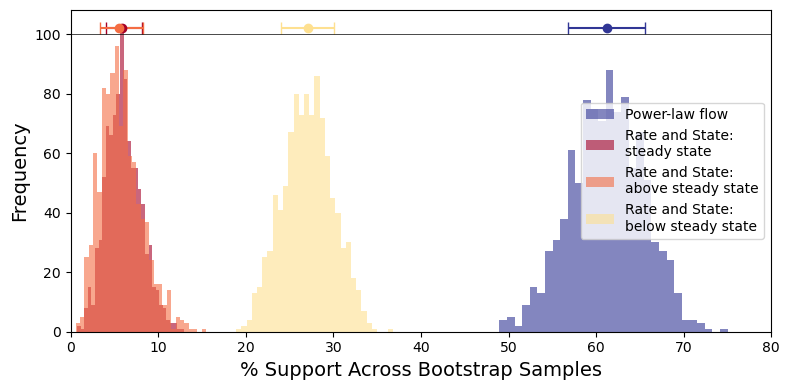

In [120]:
# CI summary table as before
ci_summary_no_LNV = bootstrap_df_no_LNV.quantile([0.15, 0.5, 0.85]).T
ci_summary_no_LNV.columns = ['15th', '50th', '85th']
ci_summary_no_LNV = ci_summary_no_LNV.sort_values('50th', ascending=False)


plt.figure(figsize=(8, 4))

# Overlay histograms with transparency so they don't block each other
plt.hist(bootstrap_df_no_LNV['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_df_no_LNV['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_df_no_LNV['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_df_no_LNV['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

plt.xlabel('% Support Across Bootstrap Samples',fontsize=14)
plt.ylabel('Frequency',fontsize=14)



for i, model in enumerate(ci_summary_no_LNV.index):
    median = ci_summary_no_LNV.loc[model, '50th']
    low = ci_summary_no_LNV.loc[model, '15th']
    high = ci_summary_no_LNV.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=102,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )


plt.legend(loc='center right')
plt.xlim([0,80])
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.tight_layout()
plt.savefig('histograms_preweight_no_LNV.pdf')
plt.show()

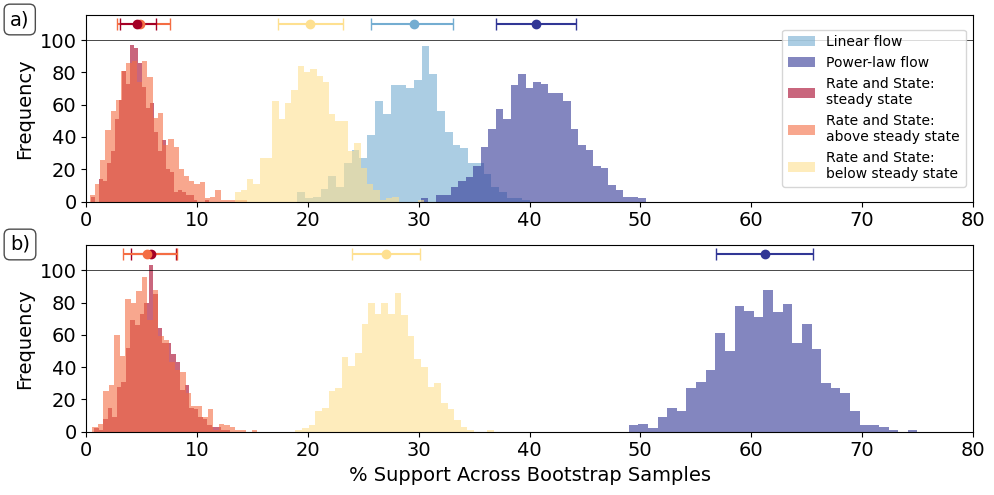

In [142]:
fig = plt.figure(figsize=(10,5))
axa = plt.subplot(2,1,1)
plt.hist(bootstrap_df['LNV'], bins=30, color=colors['LNV'], alpha=0.6, label='Linear flow')
plt.hist(bootstrap_df['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_df['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_df['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_df['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

#plt.xlabel('% Support Across Bootstrap Samples')
plt.ylabel('Frequency',fontsize=14)
#plt.legend()


for i, model in enumerate(ci_summary.index):
    median = ci_summary.loc[model, '50th']
    low = ci_summary.loc[model, '15th']
    high = ci_summary.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=110,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )


plt.legend(loc='center right')
plt.xlim([0,80])
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100],fontsize=14)
plt.xticks(fontsize=14)

axb = plt.subplot(2,1,2)

plt.hist(bootstrap_df_no_LNV['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_df_no_LNV['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_df_no_LNV['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_df_no_LNV['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

plt.xlabel('% Support Across Bootstrap Samples',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
for i, model in enumerate(ci_summary_no_LNV.index):
    median = ci_summary_no_LNV.loc[model, '50th']
    low = ci_summary_no_LNV.loc[model, '15th']
    high = ci_summary_no_LNV.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=110,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )

# Label formatting
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.xlim([0,80])
plt.xticks(fontsize=14)
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100],fontsize=14)
plt.tight_layout()
fig.text(0.01,0.95,'a)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
fig.text(0.01,0.5,'b)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))

plt.savefig('AIC_model_support_no_LNV.pdf')
plt.show()

In [122]:
ci_summary

,15th,50th,85th
PLV,36.970603,40.579924,44.220444
LNV,25.734600,29.573204,33.072091
VSF_bSS,17.322487,20.212377,23.192582
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


In [123]:
ci_summary_no_LNV

,15th,50th,85th
PLV,56.837579,61.273290,65.602561
VSF_bSS,23.966358,27.073076,30.072291
VSF_SS,4.035441,5.829456,8.110054
VSF_aSS,3.285033,5.447093,8.222437


Consider if PLV is actually LNV?

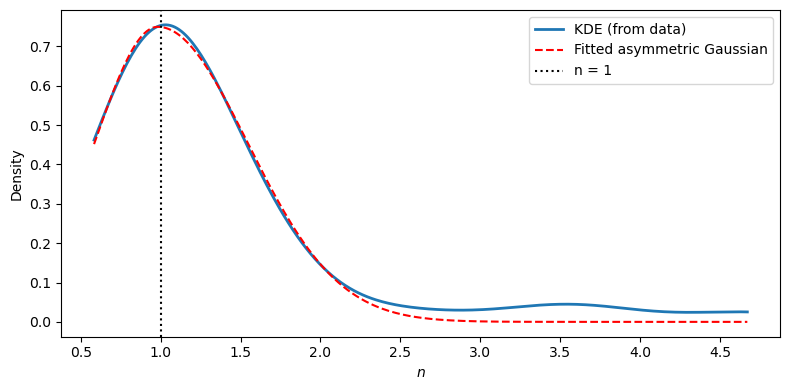

Fitted parameters:
 A = 0.749, mu = 0.982, sigma_left = 0.396, sigma_right = 0.563
Adjusted and normalized Akaike weights based on asymmetric Gaussian weighting of PLV n.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
from math import exp

# Define asymmetric Gaussian function
def split_gaussian(x, A, mu, sigma_left, sigma_right):
    """Asymmetric Gaussian: sigma_left applies for x < mu, sigma_right for x >= mu."""
    return np.where(
        x < mu,
        A * np.exp(-0.5 * ((x - mu) / sigma_left) ** 2),
        A * np.exp(-0.5 * ((x - mu) / sigma_right) ** 2)
    )

# --- Step 1: Extract PLV n values where PLV is competitive ---
n_values = AIC.loc[AIC['delta_AIC_PLV'] < 2, 'PLV_N'].values

# --- Step 2: Estimate KDE of n values ---
kde = gaussian_kde(n_values)
x_eval = np.linspace(min(n_values), max(n_values), 300)
y_eval = kde(x_eval)

# --- Step 3: Initial parameter guesses ---
mu_guess = x_eval[np.argmax(y_eval)]
A_guess = max(y_eval)
sigma_left_guess = 0.1
sigma_right_guess = 0.3
p0 = [A_guess, mu_guess, sigma_left_guess, sigma_right_guess]

# --- Step 4: Fit asymmetric Gaussian to KDE ---
popt, _ = curve_fit(split_gaussian, x_eval, y_eval, p0=p0)

# --- Step 5: Plot KDE and fit ---
plt.figure(figsize=(8, 4))
axa = plt.subplot(1,1,1)
plt.plot(x_eval, y_eval, label='KDE (from data)', lw=2)
plt.plot(x_eval, split_gaussian(x_eval, *popt), 'r--', label='Fitted asymmetric Gaussian')
plt.axvline(1.0, color='k', linestyle=':', label='n = 1')
plt.xlabel('$n$')
plt.ylabel('Density')
#plt.title('Asymmetric Gaussian fit to PLV $n$ KDE')
plt.legend()
plt.tight_layout()
plt.savefig('plv_n_distribution_fit.pdf')
plt.show()

print(f"Fitted parameters:\n A = {popt[0]:.3f}, mu = {popt[1]:.3f}, sigma_left = {popt[2]:.3f}, sigma_right = {popt[3]:.3f}")

# --- Step 6: Define normalized weighting function based on fitted asymmetric Gaussian ---
def normalized_weight(n):
    """Return weight fraction between 0 and 1, scaled so max weight is 1 at mu."""
    raw = split_gaussian(np.array([n]), *popt)[0]
    return raw / popt[0]  # Normalize so max at mu equals 1

# --- Step 7: Adjust Akaike weights based on weighting function ---
def adjust_akaike_weights(row):
    n = row['PLV_N']
    f_n = normalized_weight(n)
    
    w_lnv = row['w_LNV'] + f_n * row['w_PLV']
    w_plv = row['w_PLV'] - f_n * row['w_PLV']
    
    # Keep other weights unchanged
    w_vsf_ss = row['w_VSF_SS']
    w_vsf_ass = row['w_VSF_aSS']
    w_vsf_bss = row['w_VSF_bSS']
    
    return pd.Series({
        'w_LNV_adj': w_lnv,
        'w_PLV_adj': w_plv,
        'w_VSF_SS_adj': w_vsf_ss,
        'w_VSF_aSS_adj': w_vsf_ass,
        'w_VSF_bSS_adj': w_vsf_bss
    })

# --- Step 8: Apply adjustment to all rows ---
adjusted_weights = AIC.apply(adjust_akaike_weights, axis=1)

# --- Step 9: Join adjusted weights to original DataFrame ---
AIC = AIC.join(adjusted_weights)

# --- Step 10: Normalize adjusted weights so sum to 1 ---
model_names_adj = ['w_LNV_adj', 'w_PLV_adj', 'w_VSF_SS_adj', 'w_VSF_aSS_adj', 'w_VSF_bSS_adj']
weights_sum = AIC[model_names_adj].sum(axis=1)
for m in model_names_adj:
    AIC[m] = AIC[m] / weights_sum

print("Adjusted and normalized Akaike weights based on asymmetric Gaussian weighting of PLV n.")


In [20]:
pd.set_option('display.max_columns', None)
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_LNV,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,Slip,best_model,competitive_models,uncertain,PLV_N,w_LNV,w_PLV,w_VSF_SS,w_VSF_aSS,w_VSF_bSS,w_LNV_adj,w_PLV_adj,w_VSF_SS_adj,w_VSF_aSS_adj,w_VSF_bSS_adj
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243,4.141308e-02,0.958204,5.767303e-20,1.212555e-20,0.000383,9.903019e-01,9.315297e-03,5.767303e-20,1.212555e-20,0.000383
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452,5.159180e-14,0.500000,9.956217e-16,5.263215e-18,0.500000,1.152716e-02,4.884727e-01,9.956217e-16,5.263215e-18,0.500000
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000,6.333105e-17,0.013513,3.776740e-01,4.645613e-01,0.144252,1.208661e-13,1.351268e-02,3.776740e-01,4.645613e-01,0.144252
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107,4.121599e-01,0.480132,1.383028e-07,4.120362e-08,0.107708,8.836445e-01,8.647857e-03,1.383028e-07,4.120362e-08,0.107708
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351,2.052097e-03,0.498974,1.687282e-15,2.442719e-16,0.498974,3.205616e-01,1.804646e-01,1.687282e-15,2.442719e-16,0.498974
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201,1.162474e-03,0.998742,4.449409e-08,1.576695e-08,0.000095,7.796489e-01,2.202559e-01,4.449409e-08,1.576695e-08,0.000095
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891,3.494496e-01,0.644135,2.342481e-26,2.306625e-27,0.006416,9.913934e-01,2.191079e-03,2.342481e-26,2.306625e-27,0.006416
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462,2.458688e-07,0.500000,5.256331e-41,1.228888e-42,0.500000,4.011581e-01,9.884210e-02,5.256331e-41,1.228888e-42,0.500000
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909,8.365966e-03,0.495817,1.289305e-35,9.725302e-37,0.495817,4.624128e-01,4.176991e-02,1.289305e-35,9.725302e-37,0.495817
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931,1.227884e-03,0.499386,4.850782e-31,4.670426e-32,0.499386,4.273358e-01,7.327823e-02,4.850782e-31,4.670426e-32,0.499386


In [21]:
sum(AIC['uncertain'])/len(AIC)

0.82

In [22]:
def bootstrap_model_support_adj(AIC, model_names, n_iterations=1000, sample_size=50, random_state=None):
    """
    Bootstrap model support using adjusted Akaike weights from the AIC DataFrame.

    Parameters:
        AIC (pd.DataFrame): DataFrame with adjusted w_{model}_adj columns.
        model_names (list): List of model names without '_adj' suffix, e.g., ['LNV', 'PLV', 'VSF_SS', ...].
        n_iterations (int): Number of bootstrap resamples.
        sample_size (int): Number of events per bootstrap sample.
        random_state (int or None): Seed for reproducibility.

    Returns:
        pd.DataFrame: Rows = bootstrap runs, Columns = model percentage support.
    """
    rng = np.random.default_rng(random_state)
    results = []

    # Create the adjusted weight column names
    adj_columns = [f"w_{model}_adj" for model in model_names]

    for _ in range(n_iterations):
        # Resample with replacement
        resampled = AIC.sample(n=sample_size, replace=True, random_state=rng.integers(0, 1e9))

        # Sum adjusted weights for each model and convert to percentage
        support = {
            model: resampled[adj_col].sum() / sample_size * 100
            for model, adj_col in zip(model_names, adj_columns)
        }

        results.append(support)

    return pd.DataFrame(results)


In [23]:
bootstrap_results_adj = bootstrap_model_support_adj(AIC, model_names, n_iterations=1000, sample_size=50, random_state=42)

print(bootstrap_results_adj.describe(percentiles=[0.15, 0.5, 0.85]))

               LNV          PLV       VSF_SS      VSF_aSS      VSF_bSS
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     61.031103     8.982541     4.639090     5.083642    20.263624
std       4.973630     2.039141     1.623197     2.309102     2.682742
min      46.243473     4.116913     0.407689     0.303210    13.369408
15%      55.887782     6.792310     2.988850     2.766516    17.322487
50%      60.998517     8.839919     4.529241     4.817908    20.212377
85%      66.296752    11.115038     6.311127     7.521959    23.192582
max      73.846563    16.641335    11.092612    14.477761    30.459403


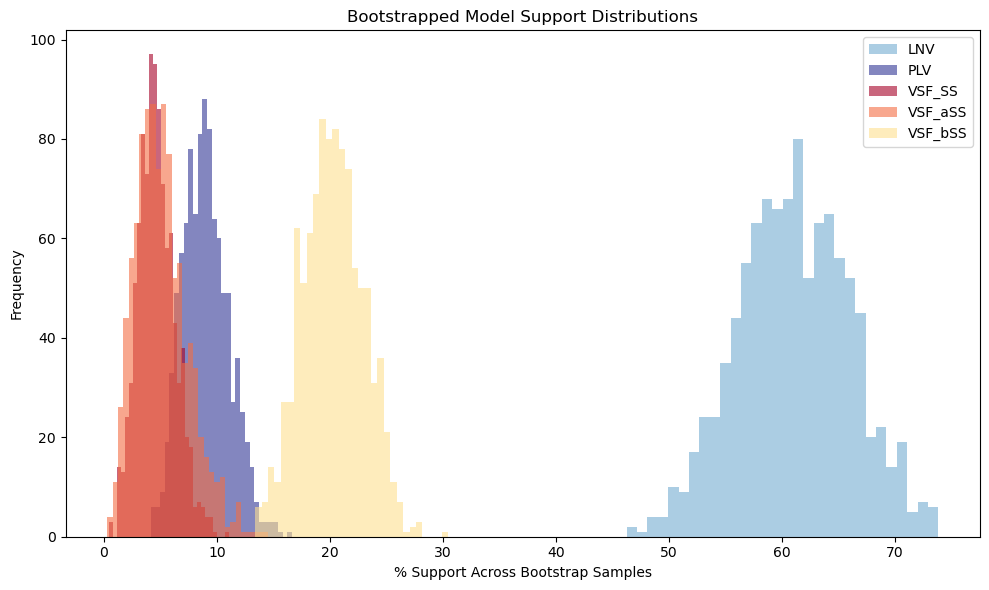

In [24]:
plt.figure(figsize=(10, 6))

# Overlay histograms with transparency so they don't block each other
plt.hist(bootstrap_results_adj['LNV'], bins=30, color=colors['LNV'], alpha=0.6, label='LNV')
plt.hist(bootstrap_results_adj['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='PLV')
plt.hist(bootstrap_results_adj['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='VSF_SS')
plt.hist(bootstrap_results_adj['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='VSF_aSS')
plt.hist(bootstrap_results_adj['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='VSF_bSS')

plt.xlabel('% Support Across Bootstrap Samples')
plt.ylabel('Frequency')
plt.title('Bootstrapped Model Support Distributions')
plt.legend()
plt.tight_layout()
plt.savefig('histograms_bootstrap_adjusted.pdf')
plt.show()

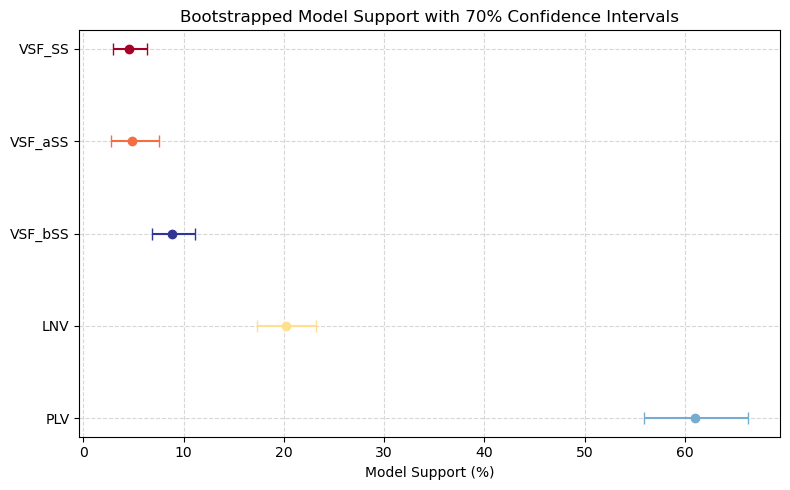

In [25]:
# CI summary table as before
ci_summary_adj = bootstrap_results_adj.quantile([0.15, 0.5, 0.85]).T
ci_summary_adj.columns = ['15th', '50th', '85th']
ci_summary_adj = ci_summary_adj.sort_values('50th', ascending=False)

# Plot
plt.figure(figsize=(8, 5))

for i, model in enumerate(ci_summary_adj.index):
    median = ci_summary_adj.loc[model, '50th']
    low = ci_summary_adj.loc[model, '15th']
    high = ci_summary_adj.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=i,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
        label=model
    )

# Label formatting
plt.yticks(ticks=range(len(ci_summary)), labels=ci_summary.index)
plt.xlabel('Model Support (%)')
plt.title('Bootstrapped Model Support with 70% Confidence Intervals')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('confidence_intervals_bootstrap_adjusted.pdf')
plt.show()


In [26]:
ci_summary_adj

,15th,50th,85th
LNV,55.887782,60.998517,66.296752
VSF_bSS,17.322487,20.212377,23.192582
PLV,6.792310,8.839919,11.115038
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


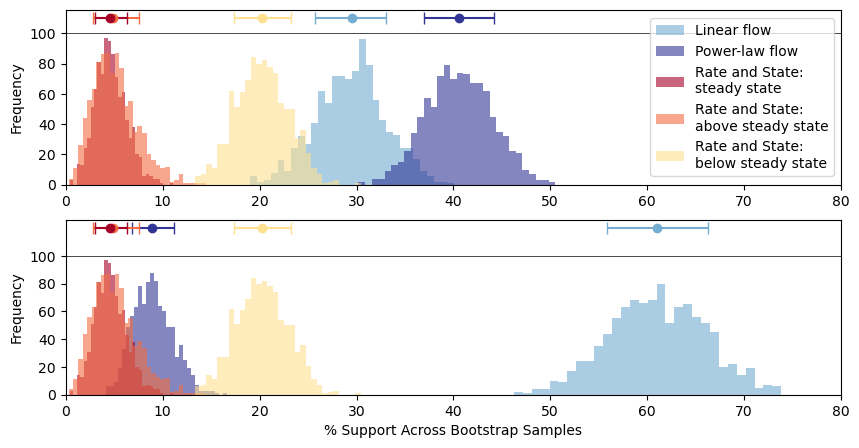

In [41]:
fig = plt.figure(figsize=(10,5))
axa = plt.subplot(2,1,1)
plt.hist(bootstrap_df['LNV'], bins=30, color=colors['LNV'], alpha=0.6, label='Linear flow')
plt.hist(bootstrap_df['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_df['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_df['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_df['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

#plt.xlabel('% Support Across Bootstrap Samples')
plt.ylabel('Frequency')
#plt.legend()


for i, model in enumerate(ci_summary.index):
    median = ci_summary.loc[model, '50th']
    low = ci_summary.loc[model, '15th']
    high = ci_summary.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=110,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )


plt.legend(loc='center right')
plt.xlim([0,80])
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])

axb = plt.subplot(2,1,2)

plt.hist(bootstrap_results_adj['LNV'], bins=30, color=colors['LNV'], alpha=0.6, label='Linear flow')
plt.hist(bootstrap_results_adj['PLV'], bins=30, color=colors['PLV'], alpha=0.6, label='Power-law flow')
plt.hist(bootstrap_results_adj['VSF_SS'], bins=30, color=colors['VSF_SS'], alpha=0.6, label='Rate and State:\nsteady state')
plt.hist(bootstrap_results_adj['VSF_aSS'], bins=30, color=colors['VSF_aSS'], alpha=0.6, label='Rate and State:\nabove steady state')
plt.hist(bootstrap_results_adj['VSF_bSS'], bins=30, color=colors['VSF_bSS'], alpha=0.6, label='Rate and State:\nbelow steady state')

plt.xlabel('% Support Across Bootstrap Samples')
plt.ylabel('Frequency')
for i, model in enumerate(ci_summary_adj.index):
    median = ci_summary_adj.loc[model, '50th']
    low = ci_summary_adj.loc[model, '15th']
    high = ci_summary_adj.loc[model, '85th']
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=median,
        y=120,
        xerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )

# Label formatting
plt.hlines(100,0,80,color='k',linewidth=0.5)
plt.xlim([0,80])
plt.yticks([0,20,40,60,80,100],[0,20,40,60,80,100])
plt.savefig('AIC_model_support.pdf')
plt.show()

In [28]:
ci_summary_adj

,15th,50th,85th
LNV,55.887782,60.998517,66.296752
VSF_bSS,17.322487,20.212377,23.192582
PLV,6.792310,8.839919,11.115038
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


In [29]:
ci_summary

,15th,50th,85th
PLV,36.970603,40.579924,44.220444
LNV,25.734600,29.573204,33.072091
VSF_bSS,17.322487,20.212377,23.192582
VSF_aSS,2.766516,4.817908,7.521959
VSF_SS,2.988850,4.529241,6.311127


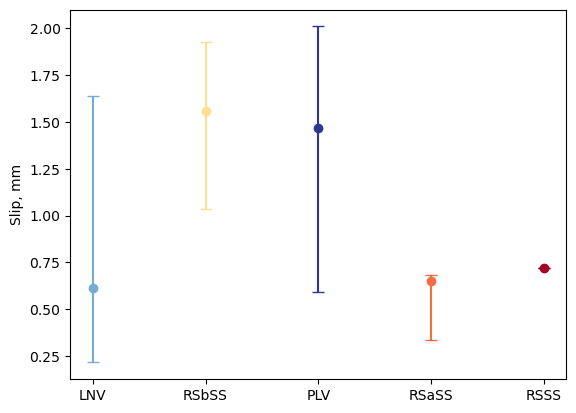

In [35]:
plt.figure()
for i, model in enumerate(ci_summary_adj.index):
    AIC_slip = AIC[AIC['best_model']==model]

    slip_df = AIC_slip['Slip'].quantile([0.15, 0.5, 0.85]).T
    #slip_df = slip_df.sort_values('50th', ascending=False)


    median = slip_df.iloc[1]
    low = slip_df.iloc[0]
    high = slip_df.iloc[2]
    colour = colors.get(model, 'grey')  # fallback to grey if not found

    plt.errorbar(
        x=i,
        y=median,
        yerr=[[median - low], [high - median]],
        fmt='o',
        color=colour,
        capsize=4,
    )
plt.xticks([0,1,2,3,4],['LNV','RSbSS','PLV','RSaSS','RSSS'])
plt.ylabel('Slip, mm')
plt.show()

In [67]:
n_values = AIC.loc[AIC['delta_AIC_PLV'] < 2, 'PLV_N'].values
Best_model_plv_comp = AIC.loc[AIC['delta_AIC_PLV'] < 2, 'best_model'].values


In [84]:
sum(n_values<1)#/len(n_values)

np.int64(23)

In [86]:
sum(n_values[np.where(Best_model_plv_comp=='PLV')[0]]>1)#/len(n_values[np.where(Best_model_plv_comp=='PLV')[0]])

np.int64(8)

In [52]:
np.median(n_values)

np.float64(0.9737268239262616)

In [53]:
np.mean(n_values)

np.float64(1.3195136548565785)

In [76]:
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_LNV,delta_AIC_PLV,delta_AIC_VSF_SS,delta_AIC_VSF_aSS,delta_AIC_VSF_bSS,Slip,best_model,competitive_models,uncertain,PLV_N,w_LNV,w_PLV,w_VSF_SS,w_VSF_aSS,w_VSF_bSS,w_LNV_adj,w_PLV_adj,w_VSF_SS_adj,w_VSF_aSS_adj,w_VSF_bSS_adj
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243,4.141308e-02,0.958204,5.767303e-20,1.212555e-20,0.000383,9.903019e-01,9.315297e-03,5.767303e-20,1.212555e-20,0.000383
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452,5.159180e-14,0.500000,9.956217e-16,5.263215e-18,0.500000,1.152716e-02,4.884727e-01,9.956217e-16,5.263215e-18,0.500000
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000,6.333105e-17,0.013513,3.776740e-01,4.645613e-01,0.144252,1.208661e-13,1.351268e-02,3.776740e-01,4.645613e-01,0.144252
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107,4.121599e-01,0.480132,1.383028e-07,4.120362e-08,0.107708,8.836445e-01,8.647857e-03,1.383028e-07,4.120362e-08,0.107708
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351,2.052097e-03,0.498974,1.687282e-15,2.442719e-16,0.498974,3.205616e-01,1.804646e-01,1.687282e-15,2.442719e-16,0.498974
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201,1.162474e-03,0.998742,4.449409e-08,1.576695e-08,0.000095,7.796489e-01,2.202559e-01,4.449409e-08,1.576695e-08,0.000095
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891,3.494496e-01,0.644135,2.342481e-26,2.306625e-27,0.006416,9.913934e-01,2.191079e-03,2.342481e-26,2.306625e-27,0.006416
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462,2.458688e-07,0.500000,5.256331e-41,1.228888e-42,0.500000,4.011581e-01,9.884210e-02,5.256331e-41,1.228888e-42,0.500000
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909,8.365966e-03,0.495817,1.289305e-35,9.725302e-37,0.495817,4.624128e-01,4.176991e-02,1.289305e-35,9.725302e-37,0.495817
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931,1.227884e-03,0.499386,4.850782e-31,4.670426e-32,0.499386,4.273358e-01,7.327823e-02,4.850782e-31,4.670426e-32,0.499386


In [64]:
len(np.where(n_values<1)[0])/len(n_values)*100

53.48837209302325

In [65]:
sum(np.logical_and(n_values>=0.9,n_values<=1.0))/len(n_values)*100

np.float64(41.86046511627907)

In [78]:
AIC['best_model'].value_counts()

best_model
PLV        21
LNV        20
VSF_bSS     5
VSF_aSS     3
VSF_SS      1
Name: count, dtype: int64

In [94]:
v = np.linspace(0,100,101)
n=[0.5,1,3]

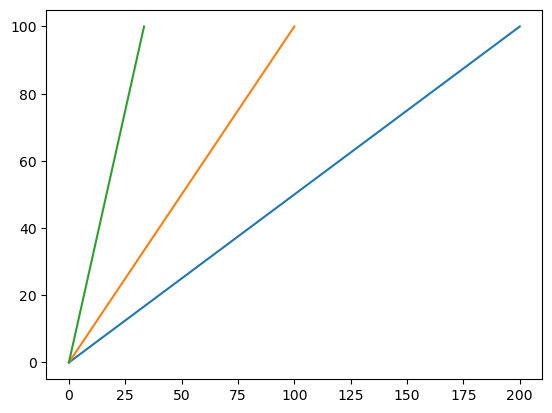

In [96]:
plt.figure()
for i in range(len(n)):
    tau = v**1/n[i]
    plt.plot(tau,v,label=n[i])
plt.show()